## Hotel data Preprocessing and Recommendation System

In [ ]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("D:\Linearloop Internship\Project - Travel\Project_datasets\HotelData.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11885 entries, 0 to 11884
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    11885 non-null  int64  
 1   _id           11885 non-null  object 
 2   Unnamed: 2    11885 non-null  int64  
 3   Name          11885 non-null  object 
 4   URL           11885 non-null  object 
 5   Total Rating  11156 non-null  object 
 6   Review_Score  11156 non-null  object 
 7   New Total     8044 non-null   float64
 8   Code          11885 non-null  int64  
 9   Rating        8044 non-null   float64
 10  City_y        11885 non-null  object 
 11  Amenities     11885 non-null  object 
 12  Latitude      11885 non-null  int64  
 13  Longitude     11885 non-null  int64  
 14  Price         11813 non-null  float64
 15  Address       11885 non-null  object 
 16  City          11885 non-null  object 
 17  CityLabel     11885 non-null  int64  
 18  cluster       11885 non-nu

In [4]:
df.head()

,Unnamed: 0,_id,Unnamed: 2,Name,URL,Total Rating,Review_Score,New Total,Code,Rating,City_y,Amenities,Latitude,Longitude,Price,Address,City,CityLabel,cluster
0,0,628752bdd04899399ca36d45,0,Cloud Green Resort & Spa,/hotels/cloud-green-resort-spa-hotel-in-mahaba...,465 Ratings,3.9 / 5,465.0,4018,3.9,Mahabaleshwar,"['Sanitizers', 'Parking (Free)', 'Wifi (Free)'...",17582,73746,2119.0,"311, Mahabaleshwar panchgani road, near lin...",Mahabaleshwar,38,4
1,1,628752bdd04899399ca36d46,1,Forest County Resort,/hotels/forest-county-resort-hotel-in-mahabale...,225 Ratings,3.8 / 5,225.0,6018,3.8,Mahabaleshwar,"['Masks (Paid)', 'Gloves (Paid)', 'Thermal scr...",17857,73812,4650.0,"VARCHI MALUSARWADI, POST-TALDEV, HOUSE NO.82,,...",Mahabaleshwar,38,4
2,2,628752bdd04899399ca36d47,2,Regenta MPG Club,/hotels/regenta-mpg-club-hotel-in-mahabaleshwa...,391 Ratings,4.3 / 5,391.0,5018,4.3,Mahabaleshwar,"['Hair nets (for hotel staff)', 'Thermal scree...",17795,73689,6388.0,"MPG Club, 233 Old Tapola Road, Dist.Satara,",Mahabaleshwar,38,4
3,3,628752bdd04899399ca36d48,3,"Bellevue Resort, Panchgani",/hotels/bellevue-resort-panchgani-hotel-in-mah...,248 Ratings,3.9 / 5,248.0,4018,3.9,Mahabaleshwar,"['Sanitizers', 'Parking (Free)', 'Wifi (Free)'...",17,73,2392.0,"Bhilar Kaswand Road, Bhilar Hill station betwe...",Mahabaleshwar,38,4
4,4,628752bdd04899399ca36d49,4,NANDANVAN TENT AND RESORT,/hotels/nandanvan-tent-and-resort-hotel-in-mah...,27 Ratings,4.4 / 5,27.0,2017,4.4,Mahabaleshwar,['Hospital in the vicinity (Between 5 and 10 k...,17,73,2637.0,"SR NO 5/1 , NEAR BSNL OFFICE , MAHABALESHWAR T...",Mahabaleshwar,38,4


In [5]:
df.drop(columns=['Unnamed: 0','Unnamed: 2'], inplace=True)

In [6]:
df.head()

,_id,Name,URL,Total Rating,Review_Score,New Total,Code,Rating,City_y,Amenities,Latitude,Longitude,Price,Address,City,CityLabel,cluster
0,628752bdd04899399ca36d45,Cloud Green Resort & Spa,/hotels/cloud-green-resort-spa-hotel-in-mahaba...,465 Ratings,3.9 / 5,465.0,4018,3.9,Mahabaleshwar,"['Sanitizers', 'Parking (Free)', 'Wifi (Free)'...",17582,73746,2119.0,"311, Mahabaleshwar panchgani road, near lin...",Mahabaleshwar,38,4
1,628752bdd04899399ca36d46,Forest County Resort,/hotels/forest-county-resort-hotel-in-mahabale...,225 Ratings,3.8 / 5,225.0,6018,3.8,Mahabaleshwar,"['Masks (Paid)', 'Gloves (Paid)', 'Thermal scr...",17857,73812,4650.0,"VARCHI MALUSARWADI, POST-TALDEV, HOUSE NO.82,,...",Mahabaleshwar,38,4
2,628752bdd04899399ca36d47,Regenta MPG Club,/hotels/regenta-mpg-club-hotel-in-mahabaleshwa...,391 Ratings,4.3 / 5,391.0,5018,4.3,Mahabaleshwar,"['Hair nets (for hotel staff)', 'Thermal scree...",17795,73689,6388.0,"MPG Club, 233 Old Tapola Road, Dist.Satara,",Mahabaleshwar,38,4
3,628752bdd04899399ca36d48,"Bellevue Resort, Panchgani",/hotels/bellevue-resort-panchgani-hotel-in-mah...,248 Ratings,3.9 / 5,248.0,4018,3.9,Mahabaleshwar,"['Sanitizers', 'Parking (Free)', 'Wifi (Free)'...",17,73,2392.0,"Bhilar Kaswand Road, Bhilar Hill station betwe...",Mahabaleshwar,38,4
4,628752bdd04899399ca36d49,NANDANVAN TENT AND RESORT,/hotels/nandanvan-tent-and-resort-hotel-in-mah...,27 Ratings,4.4 / 5,27.0,2017,4.4,Mahabaleshwar,['Hospital in the vicinity (Between 5 and 10 k...,17,73,2637.0,"SR NO 5/1 , NEAR BSNL OFFICE , MAHABALESHWAR T...",Mahabaleshwar,38,4


In [7]:
df.City.unique()

array(['Mahabaleshwar', 'Mahabalipuram', 'Manali', 'Mysore', 'Mussoorie',
       'Mathura', 'Mcleodganj', 'Nainital', 'Munnar', 'Mumbai',
       'Mukteshwar', 'Park', 'Ooty', 'Pushkar', 'Pondicherry', 'Orchha',
       'Ranchi', 'Rishikesh', 'Ranikhet', 'Shimla', 'Sonamarg', 'Shirdi',
       'Srinagar', 'Spiti', 'Shimoga', 'Tirupati', 'Tawang', 'Valley',
       'Varanasi', 'Varkala', 'Chopta', 'Coonoor', 'Dalhousie',
       'Madikeri', 'Coorg', 'Gaya', 'Dhanaulti', 'Darjeeling', 'Gangtok',
       'Gokarna', 'Deoghar', 'Hazaribagh', 'Gulmarg', 'Jabalpur', 'Hampi',
       'Kanatal', 'Joshimath', 'Auli', 'Kasol', 'Jodhpur', 'Kanyakumari',
       'Jaisalmer', 'Kausani', 'Khajjiar', 'Khajuraho', 'Kodaikanal',
       'Visakhapatnam', 'Cherrapunji', 'Madurai', 'Lake', 'Lonavala',
       'Wayanad', 'Ziro', 'udaipur', 'Abu', 'Ajmer', 'Agra', 'Alleppey',
       'Binsar', 'Almora', 'Bankura', 'Chandigarh'], dtype=object)

In [8]:
df.City.nunique()

72

In [9]:
df.isnull().sum()

_id                0
Name               0
URL                0
Total Rating     729
Review_Score     729
New Total       3841
Code               0
Rating          3841
City_y             0
Amenities          0
Latitude           0
Longitude          0
Price             72
Address            0
City               0
CityLabel          0
cluster            0
dtype: int64

In [10]:
df.drop(columns=['Code','New Total'],inplace=True)

In [11]:
df.drop(columns=['City_y'],inplace=True)

In [12]:
df.head()

,_id,Name,URL,Total Rating,Review_Score,Rating,Amenities,Latitude,Longitude,Price,Address,City,CityLabel,cluster
0,628752bdd04899399ca36d45,Cloud Green Resort & Spa,/hotels/cloud-green-resort-spa-hotel-in-mahaba...,465 Ratings,3.9 / 5,3.9,"['Sanitizers', 'Parking (Free)', 'Wifi (Free)'...",17582,73746,2119.0,"311, Mahabaleshwar panchgani road, near lin...",Mahabaleshwar,38,4
1,628752bdd04899399ca36d46,Forest County Resort,/hotels/forest-county-resort-hotel-in-mahabale...,225 Ratings,3.8 / 5,3.8,"['Masks (Paid)', 'Gloves (Paid)', 'Thermal scr...",17857,73812,4650.0,"VARCHI MALUSARWADI, POST-TALDEV, HOUSE NO.82,,...",Mahabaleshwar,38,4
2,628752bdd04899399ca36d47,Regenta MPG Club,/hotels/regenta-mpg-club-hotel-in-mahabaleshwa...,391 Ratings,4.3 / 5,4.3,"['Hair nets (for hotel staff)', 'Thermal scree...",17795,73689,6388.0,"MPG Club, 233 Old Tapola Road, Dist.Satara,",Mahabaleshwar,38,4
3,628752bdd04899399ca36d48,"Bellevue Resort, Panchgani",/hotels/bellevue-resort-panchgani-hotel-in-mah...,248 Ratings,3.9 / 5,3.9,"['Sanitizers', 'Parking (Free)', 'Wifi (Free)'...",17,73,2392.0,"Bhilar Kaswand Road, Bhilar Hill station betwe...",Mahabaleshwar,38,4
4,628752bdd04899399ca36d49,NANDANVAN TENT AND RESORT,/hotels/nandanvan-tent-and-resort-hotel-in-mah...,27 Ratings,4.4 / 5,4.4,['Hospital in the vicinity (Between 5 and 10 k...,17,73,2637.0,"SR NO 5/1 , NEAR BSNL OFFICE , MAHABALESHWAR T...",Mahabaleshwar,38,4


In [13]:
mean_price = round(df['Price'].mean())

In [14]:
df['Price'].fillna(mean_price, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19712\154942636.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(mean_price, inplace=True)


In [15]:
df.isnull().sum()

_id                0
Name               0
URL                0
Total Rating     729
Review_Score     729
Rating          3841
Amenities          0
Latitude           0
Longitude          0
Price              0
Address            0
City               0
CityLabel          0
cluster            0
dtype: int64

In [16]:
def extract_rating(rating_str):
    if not isinstance(rating_str, str):
        return None
    
    parts = rating_str.split('/')
    
    first_part = parts[0].strip()
    
    return first_part

In [17]:
df["Review_Score"] = df["Review_Score"].apply(extract_rating)

In [18]:
df.head()

,_id,Name,URL,Total Rating,Review_Score,Rating,Amenities,Latitude,Longitude,Price,Address,City,CityLabel,cluster
0,628752bdd04899399ca36d45,Cloud Green Resort & Spa,/hotels/cloud-green-resort-spa-hotel-in-mahaba...,465 Ratings,3.9,3.9,"['Sanitizers', 'Parking (Free)', 'Wifi (Free)'...",17582,73746,2119.0,"311, Mahabaleshwar panchgani road, near lin...",Mahabaleshwar,38,4
1,628752bdd04899399ca36d46,Forest County Resort,/hotels/forest-county-resort-hotel-in-mahabale...,225 Ratings,3.8,3.8,"['Masks (Paid)', 'Gloves (Paid)', 'Thermal scr...",17857,73812,4650.0,"VARCHI MALUSARWADI, POST-TALDEV, HOUSE NO.82,,...",Mahabaleshwar,38,4
2,628752bdd04899399ca36d47,Regenta MPG Club,/hotels/regenta-mpg-club-hotel-in-mahabaleshwa...,391 Ratings,4.3,4.3,"['Hair nets (for hotel staff)', 'Thermal scree...",17795,73689,6388.0,"MPG Club, 233 Old Tapola Road, Dist.Satara,",Mahabaleshwar,38,4
3,628752bdd04899399ca36d48,"Bellevue Resort, Panchgani",/hotels/bellevue-resort-panchgani-hotel-in-mah...,248 Ratings,3.9,3.9,"['Sanitizers', 'Parking (Free)', 'Wifi (Free)'...",17,73,2392.0,"Bhilar Kaswand Road, Bhilar Hill station betwe...",Mahabaleshwar,38,4
4,628752bdd04899399ca36d49,NANDANVAN TENT AND RESORT,/hotels/nandanvan-tent-and-resort-hotel-in-mah...,27 Ratings,4.4,4.4,['Hospital in the vicinity (Between 5 and 10 k...,17,73,2637.0,"SR NO 5/1 , NEAR BSNL OFFICE , MAHABALESHWAR T...",Mahabaleshwar,38,4


In [19]:
df['Review_Score'] = pd.to_numeric(df['Review_Score'], errors='coerce')
mean_review_score = round(df['Review_Score'].mean(), 1)
df['Review_Score'].fillna(mean_review_score, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19712\2768001096.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review_Score'].fillna(mean_review_score, inplace=True)


In [20]:
df.isnull().sum()

_id                0
Name               0
URL                0
Total Rating     729
Review_Score       0
Rating          3841
Amenities          0
Latitude           0
Longitude          0
Price              0
Address            0
City               0
CityLabel          0
cluster            0
dtype: int64

In [21]:
df.drop(columns=['Total Rating','Rating'],inplace=True)

In [22]:
df.head()

,_id,Name,URL,Review_Score,Amenities,Latitude,Longitude,Price,Address,City,CityLabel,cluster
0,628752bdd04899399ca36d45,Cloud Green Resort & Spa,/hotels/cloud-green-resort-spa-hotel-in-mahaba...,3.9,"['Sanitizers', 'Parking (Free)', 'Wifi (Free)'...",17582,73746,2119.0,"311, Mahabaleshwar panchgani road, near lin...",Mahabaleshwar,38,4
1,628752bdd04899399ca36d46,Forest County Resort,/hotels/forest-county-resort-hotel-in-mahabale...,3.8,"['Masks (Paid)', 'Gloves (Paid)', 'Thermal scr...",17857,73812,4650.0,"VARCHI MALUSARWADI, POST-TALDEV, HOUSE NO.82,,...",Mahabaleshwar,38,4
2,628752bdd04899399ca36d47,Regenta MPG Club,/hotels/regenta-mpg-club-hotel-in-mahabaleshwa...,4.3,"['Hair nets (for hotel staff)', 'Thermal scree...",17795,73689,6388.0,"MPG Club, 233 Old Tapola Road, Dist.Satara,",Mahabaleshwar,38,4
3,628752bdd04899399ca36d48,"Bellevue Resort, Panchgani",/hotels/bellevue-resort-panchgani-hotel-in-mah...,3.9,"['Sanitizers', 'Parking (Free)', 'Wifi (Free)'...",17,73,2392.0,"Bhilar Kaswand Road, Bhilar Hill station betwe...",Mahabaleshwar,38,4
4,628752bdd04899399ca36d49,NANDANVAN TENT AND RESORT,/hotels/nandanvan-tent-and-resort-hotel-in-mah...,4.4,['Hospital in the vicinity (Between 5 and 10 k...,17,73,2637.0,"SR NO 5/1 , NEAR BSNL OFFICE , MAHABALESHWAR T...",Mahabaleshwar,38,4


In [23]:
df.CityLabel.nunique()

72

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11885 entries, 0 to 11884
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           11885 non-null  object 
 1   Name          11885 non-null  object 
 2   URL           11885 non-null  object 
 3   Review_Score  11885 non-null  float64
 4   Amenities     11885 non-null  object 
 5   Latitude      11885 non-null  int64  
 6   Longitude     11885 non-null  int64  
 7   Price         11885 non-null  float64
 8   Address       11885 non-null  object 
 9   City          11885 non-null  object 
 10  CityLabel     11885 non-null  int64  
 11  cluster       11885 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.1+ MB


In [26]:
df['Price'] = df['Price'].astype(int)

In [27]:
df.isnull().sum()

_id             0
Name            0
URL             0
Review_Score    0
Amenities       0
Latitude        0
Longitude       0
Price           0
Address         0
City            0
CityLabel       0
cluster         0
dtype: int64

In [28]:
df.head()

,_id,Name,URL,Review_Score,Amenities,Latitude,Longitude,Price,Address,City,CityLabel,cluster
0,628752bdd04899399ca36d45,Cloud Green Resort & Spa,/hotels/cloud-green-resort-spa-hotel-in-mahaba...,3.9,"['Sanitizers', 'Parking (Free)', 'Wifi (Free)'...",17582,73746,2119,"311, Mahabaleshwar panchgani road, near lin...",Mahabaleshwar,38,4
1,628752bdd04899399ca36d46,Forest County Resort,/hotels/forest-county-resort-hotel-in-mahabale...,3.8,"['Masks (Paid)', 'Gloves (Paid)', 'Thermal scr...",17857,73812,4650,"VARCHI MALUSARWADI, POST-TALDEV, HOUSE NO.82,,...",Mahabaleshwar,38,4
2,628752bdd04899399ca36d47,Regenta MPG Club,/hotels/regenta-mpg-club-hotel-in-mahabaleshwa...,4.3,"['Hair nets (for hotel staff)', 'Thermal scree...",17795,73689,6388,"MPG Club, 233 Old Tapola Road, Dist.Satara,",Mahabaleshwar,38,4
3,628752bdd04899399ca36d48,"Bellevue Resort, Panchgani",/hotels/bellevue-resort-panchgani-hotel-in-mah...,3.9,"['Sanitizers', 'Parking (Free)', 'Wifi (Free)'...",17,73,2392,"Bhilar Kaswand Road, Bhilar Hill station betwe...",Mahabaleshwar,38,4
4,628752bdd04899399ca36d49,NANDANVAN TENT AND RESORT,/hotels/nandanvan-tent-and-resort-hotel-in-mah...,4.4,['Hospital in the vicinity (Between 5 and 10 k...,17,73,2637,"SR NO 5/1 , NEAR BSNL OFFICE , MAHABALESHWAR T...",Mahabaleshwar,38,4


In [29]:
df['Amenities'][0]

'[\'Sanitizers\', \'Parking (Free)\', \'Wifi (Free)\', \'Air Conditioning\', \'Room service (Limited duration)\', \'Power backup\', \'Intercom\', \'Telephone\', \'Housekeeping\', \'Public restrooms\', \'Laundry (Paid)\', \'Newspaper (English)\', \'Bathroom (Attached)\', \'Swimming Pool (Common Pool, Kids Pool)\', "Children\'s play area", \'Restaurant\', \'Dining Area\', \'Barbeque\', \'Kids meals\', \'CCTV\', \'Fire extinguishers\', \'Security\', \'Luggage storage\', \'Mail services\', \'Luggage assistance\', \'Electrical Sockets\', \'Doctor on call\', \'Ticket/ Tour Assistance\', \'Bellboy service\', \'Wake-up Call / Service\', \'Facial treatments\', \'Spa (Paid)\', \'Massage (Couple Massage, Foot massage)\', \'Steam and Sauna (Paid)\', \'Bonfire (On Request)\', \'Vehicle Rentals\', \'Indoor games\', \'Lawn\', \'Reception\', \'Seating Area\', \'Conference room\', \'Printer\']'

In [30]:
def clean_text(text):
    cleaned_text = text.replace('[', '').replace(']', '').replace('\'', '').replace('/', '')
    return cleaned_text

In [31]:
df['Amenities'] = df['Amenities'].apply(clean_text)

In [32]:
df.head()

,_id,Name,URL,Review_Score,Amenities,Latitude,Longitude,Price,Address,City,CityLabel,cluster
0,628752bdd04899399ca36d45,Cloud Green Resort & Spa,/hotels/cloud-green-resort-spa-hotel-in-mahaba...,3.9,"Sanitizers, Parking (Free), Wifi (Free), Air C...",17582,73746,2119,"311, Mahabaleshwar panchgani road, near lin...",Mahabaleshwar,38,4
1,628752bdd04899399ca36d46,Forest County Resort,/hotels/forest-county-resort-hotel-in-mahabale...,3.8,"Masks (Paid), Gloves (Paid), Thermal screening...",17857,73812,4650,"VARCHI MALUSARWADI, POST-TALDEV, HOUSE NO.82,,...",Mahabaleshwar,38,4
2,628752bdd04899399ca36d47,Regenta MPG Club,/hotels/regenta-mpg-club-hotel-in-mahabaleshwa...,4.3,"Hair nets (for hotel staff), Thermal screening...",17795,73689,6388,"MPG Club, 233 Old Tapola Road, Dist.Satara,",Mahabaleshwar,38,4
3,628752bdd04899399ca36d48,"Bellevue Resort, Panchgani",/hotels/bellevue-resort-panchgani-hotel-in-mah...,3.9,"Sanitizers, Parking (Free), Wifi (Free), Air C...",17,73,2392,"Bhilar Kaswand Road, Bhilar Hill station betwe...",Mahabaleshwar,38,4
4,628752bdd04899399ca36d49,NANDANVAN TENT AND RESORT,/hotels/nandanvan-tent-and-resort-hotel-in-mah...,4.4,Hospital in the vicinity (Between 5 and 10 km)...,17,73,2637,"SR NO 5/1 , NEAR BSNL OFFICE , MAHABALESHWAR T...",Mahabaleshwar,38,4


In [33]:
df.describe(include='all')

,_id,Name,URL,Review_Score,Amenities,Latitude,Longitude,Price,Address,City,CityLabel,cluster
count,11885,11885,11885,11885.000000,11885,11885.000000,11885.000000,11885.000000,11885,11885,11885.000000,11885.000000
unique,11885,11425,11629,NaN,11523,NaN,NaN,NaN,11592,72,NaN,NaN
top,628752bdd04899399ca36d45,Hotel President,/hotels/goldstone-farms-hotel-in-pushkar-47836...,NaN,,NaN,NaN,NaN,"Behind Powerhouse, Bhagawanpura , Pushkar",Mumbai,NaN,NaN
freq,1,6,6,NaN,39,NaN,NaN,NaN,6,840,NaN,NaN
mean,NaN,NaN,NaN,3.780606,NaN,2024.098443,7295.982667,3071.485486,NaN,NaN,39.602524,20.300210
std,NaN,NaN,NaN,0.492292,NaN,6696.811823,22486.937019,3768.290476,NaN,NaN,21.102769,14.091328
min,NaN,NaN,NaN,1.100000,NaN,8.000000,-109.000000,199.000000,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,3.800000,NaN,17.000000,74.000000,1323.000000,NaN,NaN,24.000000,8.000000
50%,NaN,NaN,NaN,3.800000,NaN,25.000000,77.000000,2072.000000,NaN,NaN,43.000000,18.000000
75%,NaN,NaN,NaN,3.900000,NaN,30.000000,79.000000,3468.000000,NaN,NaN,56.000000,31.000000


[Text(0.5, 1.0, 'Price vs Review Score')]

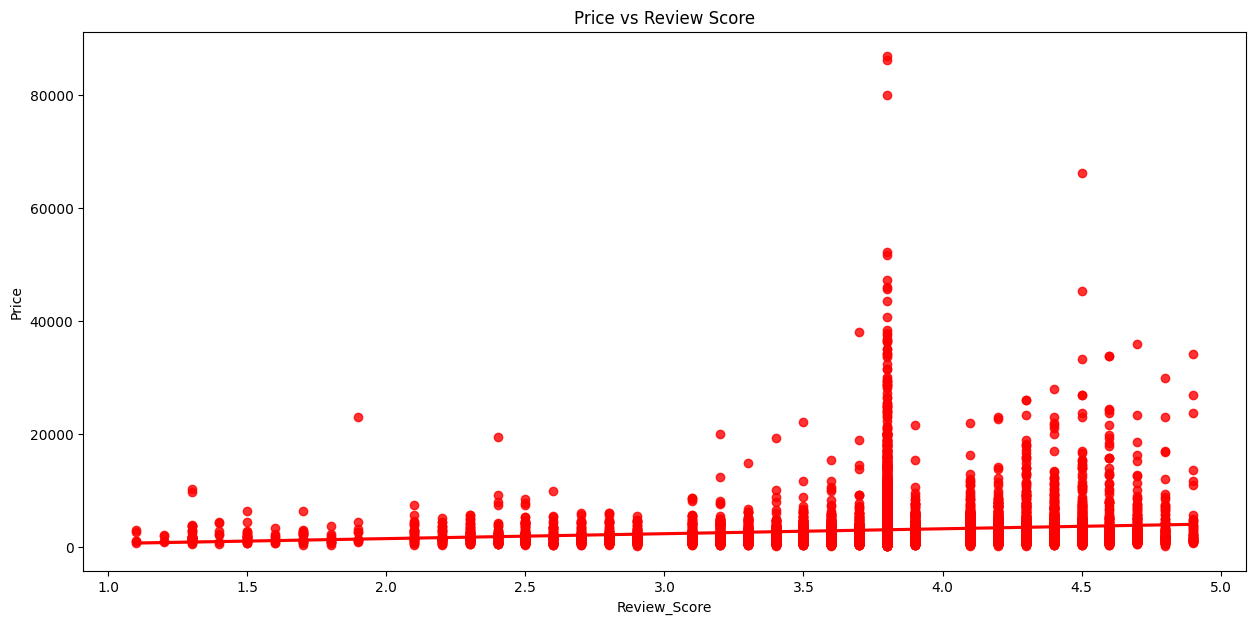

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7))
sns.regplot(data=df, y='Price', x='Review_Score', color='r').set(title='Price vs Review Score')

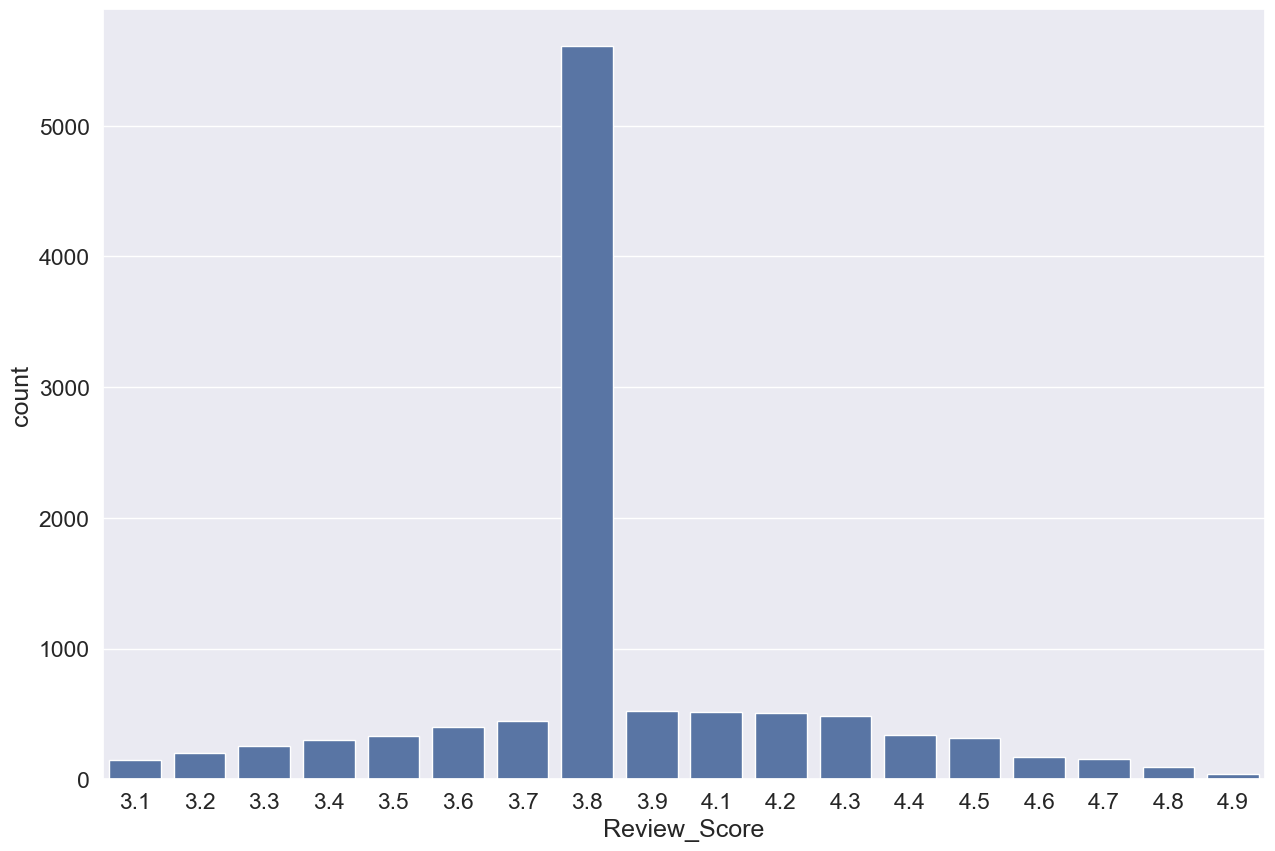

In [35]:
filtered_df = df[df['Review_Score'] >= 3]

plot = filtered_df[['Name', 'Review_Score']].drop_duplicates()

sns.set(font_scale=1.5)

a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)

sns.countplot(ax=ax, x='Review_Score', data=plot)

plt.show()

[Text(0.5, 1.0, 'Number of hotels in each city')]

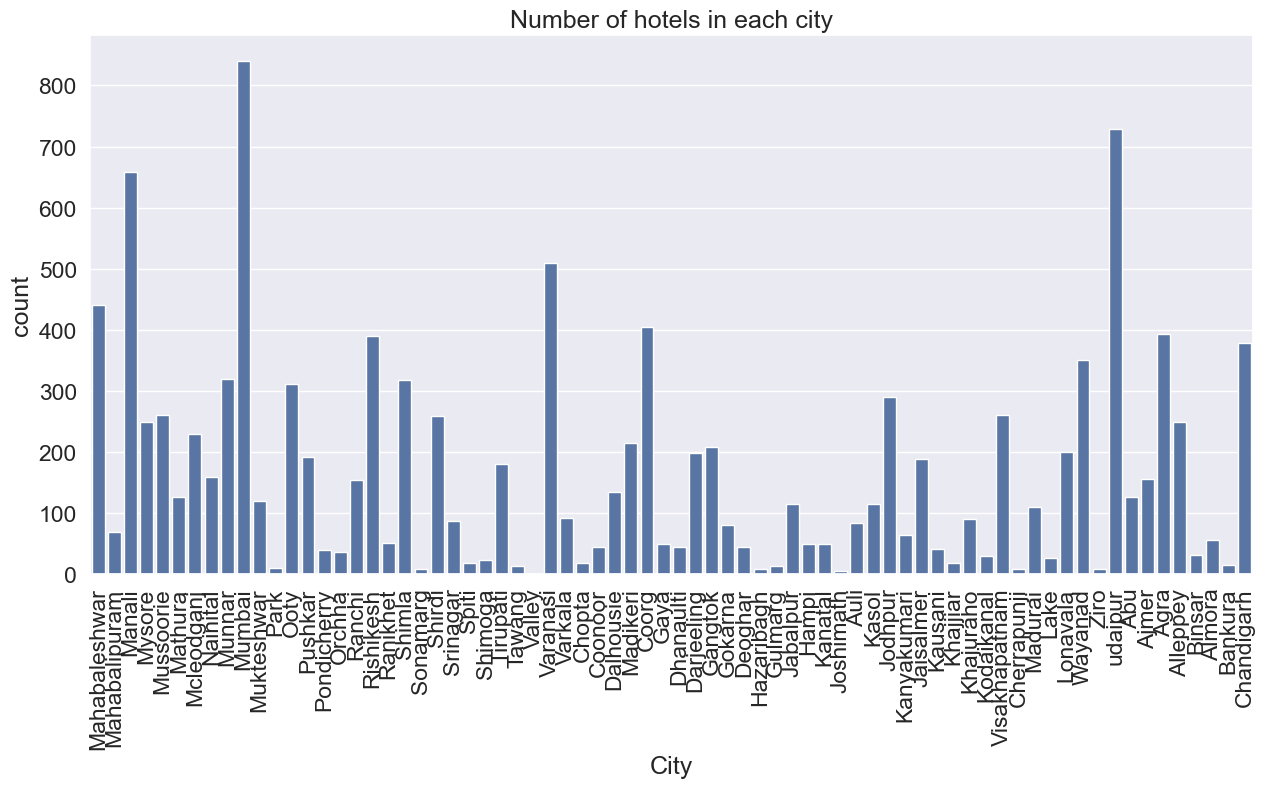

In [37]:
plot = df[['City']]
plot.groupby('City').count()
sns.set(font_scale = 1.5)
a4_dims = (15,7)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=90)
sns.countplot(ax = ax, x = 'City', data=plot).set(title='Number of hotels in each city')

In [39]:
def citybased(city):
    df['City'] = df['City'].str.lower()
    citybase = df[df['City'] == city.lower()]
    citybase = citybase.sort_values(by='Review_Score', ascending=False)
    citybase.drop_duplicates(subset = '_id', keep = 'first', inplace=True)
    if(citybase.empty==0):
        hname = citybase[['Name','Price','Review_Score','Address','Amenities','URL']]
        return hname.head(5)
    else:
        print('No Hotels Available!')

In [44]:
citybased('udaipur')

,Name,Price,Review_Score,Address,Amenities,URL
9745,HISTORIA ROYAL,2565,3.8,Historia Royal 100 Feet Road New Bhupalpura Ud...,"Masks (Free), Disinfectant wipes (Free), Sanit...",/hotels/historia-royal-hotel-in-udaipur-439721...
10224,Hotel Krishn Palace,974,3.8,"Krishna Plaza,Opp. Ashoka Place Garden, Plot N...","Masks (Paid), Sanitizers (Free), Parking (Free...",/hotels/krishn-palace-hotel-in-udaipur-8116599...
10226,StayVista at Mewar Mansion,8100,3.8,"Mewar Mansion, Nohra village, behind Araliyas ...","KitchenKitchenette (Microwave), Power backup, ...",/hotels/stayvista-at-mewar-mansion-hotel-in-ud...
10227,Hotel Rion,1824,3.8,"TORAN BAWRI, 7, MEWAR MOTORS LINK ROAD, CITY\r...","Masks (Paid), Disinfectant wipes, Gloves, Sani...",/hotels/rion-hotel-in-udaipur-3392505165256393...
10228,Nandan Van Farm House NO 8,5445,3.8,"8, Parswanath Farm Villa opposite kesariya b...","KitchenKitchenette (Cooking appliances, Cutler...",/hotels/nandan-van-farm-house-no-8-hotel-in-ud...


In [47]:
df['Amenities'][0]

'Sanitizers, Parking (Free), Wifi (Free), Air Conditioning, Room service (Limited duration), Power backup, Intercom, Telephone, Housekeeping, Public restrooms, Laundry (Paid), Newspaper (English), Bathroom (Attached), Swimming Pool (Common Pool, Kids Pool), "Childrens play area", Restaurant, Dining Area, Barbeque, Kids meals, CCTV, Fire extinguishers, Security, Luggage storage, Mail services, Luggage assistance, Electrical Sockets, Doctor on call, Ticket Tour Assistance, Bellboy service, Wake-up Call  Service, Facial treatments, Spa (Paid), Massage (Couple Massage, Foot massage), Steam and Sauna (Paid), Bonfire (On Request), Vehicle Rentals, Indoor games, Lawn, Reception, Seating Area, Conference room, Printer'

In [51]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [69]:
def requirementbased(city, features):
    df['Name'] = df['Name'].str.lower()
    df['Amenities'] = df['Amenities'].str.lower()
    features = features.lower()
    features_token = word_tokenize(features)
    sw = stopwords.words('english')
    lemm = WordNetLemmatizer()
    f1_set = {w for w in features_token if not w in sw}
    f_set = set()
    for se in f1_set:
        f_set.add(lemm.lemmatize(se))
    reqbased = df[df['City'] == city.lower()]
    if reqbased.empty:
            print("No hotels data found for this city.")
            return None
    reqbased = reqbased.sort_values(by='Review_Score', ascending=False)
    reqbased = reqbased.set_index(np.arange(reqbased.shape[0]))
    cos = [];
    
    for i in range(reqbased.shape[0]):
        temp_tokens = word_tokenize(reqbased['Amenities'][i])
        temp1_set = {w for w in temp_tokens if not w in sw}
        temp_set = set()
        for se in temp1_set:
            temp_set.add(lemm.lemmatize(se))
        revector = temp_set.intersection(f_set)
        cos.append(len(revector))
    reqbased['Similarity'] = cos
    reqbased = reqbased.sort_values(by='Similarity', ascending=False)
    reqbased.drop_duplicates(subset='_id',keep='first',inplace=True)
    return reqbased[['Name','Price','Review_Score','Address','Amenities','URL','Similarity']].head()

In [72]:
requirementbased('chandigarh', 'i want hot water')

,Name,Price,Review_Score,Address,Amenities,URL,Similarity
159,silver oaks- 2bhk apartment,4500,3.8,"Highland Park Teracces, Flat No: 100 C, Third ...","sanitizers (free), sanitizers installed, kitch...",/hotels/silver-oaks-2bhk-apartment-hotel-in-ch...,2
141,hotel gulmeher by ocean hospitality,1286,3.8,"Hotel NIDO- Shimla kalka highway Zirakpur, Pun...","masks (free), disinfectant wipes (free), glove...",/hotels/gulmeher-by-ocean-hospitality-hotel-in...,1
291,hotel glass inn,1740,3.5,"Sco No.1 wadhawa Nagar SHIMLA KALKA HIGHWAY , ...","disinfectant wipes (free), hair nets, thermal ...",/hotels/glass-inn-hotel-in-chandigarh-96417825...,1
11,dreamz inn & suites,3003,4.4,"Plot No 7,8,9 and 10, Shri Bala Ji Complex, Dh...","masks, disinfectant wipes, sanitizers, face sh...",/hotels/dreamz-inn-suites-hotel-in-chandigarh-...,1
217,hotel classic,2814,3.8,"Sec 403-403, Sec 35-C, Chandigarh","masks, disinfectant wipes, gloves, sanitizers,...",/hotels/classic-hotel-in-chandigarh-6372139558...,1


In [75]:
def recommedor(city, features, price):
    df['Name'] = df['Name'].str.lower()
    df['Amenities'] = df['Amenities'].str.lower()
    features = features.lower()
    features_token = word_tokenize(features)
    sw = stopwords.words('english')
    lemm = WordNetLemmatizer()
    f1_set = {w for w in features_token if not w in sw}
    f_set = set()
    for se in f1_set:
        f_set.add(lemm.lemmatize(se))
    reqbased = df[df['City'] == city.lower()]
    if reqbased.empty:
            print("No hotels data found for this city.")
            return None
    reqbased = reqbased[reqbased['Price'] <= price].sort_values(by='Review_Score', ascending=False)
    reqbased = reqbased.set_index(np.arange(reqbased.shape[0]))
    cos = [];
    
    for i in range(reqbased.shape[0]):
        temp_tokens = word_tokenize(reqbased['Amenities'][i])
        temp1_set = {w for w in temp_tokens if not w in sw}
        temp_set = set()
        for se in temp1_set:
            temp_set.add(lemm.lemmatize(se))
        revector = temp_set.intersection(f_set)
        cos.append(len(revector))
    reqbased['Similarity'] = cos
    reqbased = reqbased.sort_values(by='Similarity', ascending=False)
    reqbased.drop_duplicates(subset='_id',keep='first',inplace=True)
    return reqbased[['Name','Price','Review_Score','Address','Amenities','URL','Similarity']].head()

In [81]:
recommedor('Mumbai', 'i want hot water', 1000)

,Name,Price,Review_Score,Address,Amenities,URL,Similarity
4,neenava dormitory,491,4.5,"GALA NO 4, SHREE GANESH COMPOUND, DSILVA BAUG ...","masks (paid), gloves (paid), thermal screening...",/hotels/neenava-dormitory-hotel-in-mumbai-2455...,1
0,sleep well dormitory,450,4.5,"1,2nd Floor, Shree Dhara Dham Society, Ramraj ...","parking (free), wifi (free), air conditioning ...",/hotels/sleep-well-dormitory-hotel-in-mumbai-6...,0
51,hotel shadab palace,761,3.7,"Tandel Street (N),Siddhi Mohalla,Near Baba Gha...","masks (paid), gloves (paid), sanitizers (paid)...",/hotels/shadab-palace-hotel-in-mumbai-21737546...,0
59,hotel new vasantashram,685,3.4,"Hostel New Vashantashram, commissioner of Pol...","wifi (free), housekeeping, laundry (paid), tel...",/hotels/new-vasantashram-hotel-in-mumbai-65283...,0
58,oyo 9957 hotel terminus square,930,3.5,"104, 1st Floor, Radhika Residency, Mandakini P...","sanitizers, face shields (for hotel staff), sa...",/hotels/oyo-9957-terminus-square-hotel-in-mumb...,0


In [80]:
import pickle

# Pickle the function
with open('recommedor.pkl', 'wb') as f:
    pickle.dump(recommedor, f)

# Pickle the DataFrame
with open('hotel_dataframe.pkl', 'wb') as f:
    pickle.dump(df, f)